<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek38.do.txt  -->
<!-- dom:TITLE: Exercises week 38 -->

# Exercises week 38
**September 16-20, 2024**

Date: **Deadline is Friday September 20 at midnight**

## Overarching aims of the exercises this week

The aim of the exercises this week is to derive the equations for the bias-variance tradeoff to be used in project 1 as well as testing this for a simpler function using the bootstrap method. The exercises here can be reused in project 1 as well.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

We assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined 
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

Explain what the terms mean and discuss their interpretations.

Perform then a bias-variance analysis of a simple one-dimensional (or other models of your choice)  function by
studying the MSE value as function of the complexity of your model. Use ordinary least squares only.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

Error: 0.013121574145794759
Bias^2: 0.012073649463110929
Var: 0.0010479246826838272
0.013121574145794759 >= 0.012073649463110929 + 0.0010479246826838272 = 0.013121574145794755


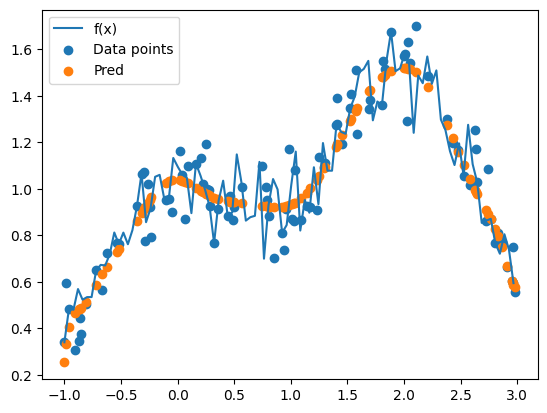

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 500
n_boostraps = 100
degree = 18  # A quite high value, just to show.
noise = 0.1

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation.
# Not neccesary, but convenient.
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)')
plt.scatter(x_test, y_test, label='Data points')
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')
plt.legend()
plt.show()